In [103]:
# 라이브러리
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as spst

# 한글폰트 지정(맑은고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 고해상도
%config InlineBackend.figure_format = 'retina'

- csv 불러오기

In [104]:
wt = pd.read_csv('weather.csv')
wt.drop(columns = 'Unnamed: 0' , axis =1 ,inplace = True)
chu = pd.read_csv('df_merged_date&chu.csv')
chu.drop(columns = ['Unnamed: 0','연도'] , axis =1 ,inplace = True)

In [105]:
wt.head(2)

,날짜,시간,서울기온,서울강수량,서울풍속,서울습도,서울시정,서울지면온도,부산기온,부산강수량,...,대구풍속,대구습도,대구시정,대구지면온도,대전기온,대전강수량,대전풍속,대전습도,대전시정,대전지면온도
0,2017-10-01,0,18.4,NaN,1.3,83,513,15.1,18.6,NaN,...,0.5,84,1811,12.5,15.5,NaN,1.0,93,870,14.3
1,2017-10-01,1,18.0,NaN,1.6,81,582,15.2,18.1,NaN,...,1.2,88,1785,12.2,14.7,NaN,0.9,95,758,13.7


In [106]:
wt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      768 non-null    object 
 1   시간      768 non-null    int64  
 2   서울기온    768 non-null    float64
 3   서울강수량   110 non-null    float64
 4   서울풍속    768 non-null    float64
 5   서울습도    768 non-null    int64  
 6   서울시정    768 non-null    int64  
 7   서울지면온도  768 non-null    float64
 8   부산기온    768 non-null    float64
 9   부산강수량   82 non-null     float64
 10  부산풍속    762 non-null    float64
 11  부산습도    768 non-null    int64  
 12  부산시정    768 non-null    int64  
 13  부산지면온도  768 non-null    float64
 14  대구기온    768 non-null    float64
 15  대구강수량   75 non-null     float64
 16  대구풍속    768 non-null    float64
 17  대구습도    768 non-null    int64  
 18  대구시정    768 non-null    int64  
 19  대구지면온도  768 non-null    float64
 20  대전기온    768 non-null    float64
 21  대전강수량   90 non-null     float64
 22  대전

In [107]:
wt.fillna(0, inplace = True)
wt.isna().sum()

날짜        0
시간        0
서울기온      0
서울강수량     0
서울풍속      0
서울습도      0
서울시정      0
서울지면온도    0
부산기온      0
부산강수량     0
부산풍속      0
부산습도      0
부산시정      0
부산지면온도    0
대구기온      0
대구강수량     0
대구풍속      0
대구습도      0
대구시정      0
대구지면온도    0
대전기온      0
대전강수량     0
대전풍속      0
대전습도      0
대전시정      0
대전지면온도    0
dtype: int64

In [108]:
chu.head(2)

,날짜,시간,연휴,추석기준,연휴길이,출발지,도착지,소요시간(분),요일,구분
0,2017-10-01,0.0,추석,D-3,1.0,서울,부산,274.466,일,연휴
1,2017-10-01,1.0,추석,D-3,1.0,서울,부산,260.141,일,연휴


In [109]:
chu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       772 non-null    object 
 1   시간       772 non-null    float64
 2   연휴       772 non-null    object 
 3   추석기준     772 non-null    object 
 4   연휴길이     772 non-null    float64
 5   출발지      772 non-null    object 
 6   도착지      772 non-null    object 
 7   소요시간(분)  770 non-null    float64
 8   요일       772 non-null    object 
 9   구분       772 non-null    object 
dtypes: float64(3), object(7)
memory usage: 60.4+ KB


In [110]:
chu['시간'] = chu['시간'].astype(int)
chu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       772 non-null    object 
 1   시간       772 non-null    int32  
 2   연휴       772 non-null    object 
 3   추석기준     772 non-null    object 
 4   연휴길이     772 non-null    float64
 5   출발지      772 non-null    object 
 6   도착지      772 non-null    object 
 7   소요시간(분)  770 non-null    float64
 8   요일       772 non-null    object 
 9   구분       772 non-null    object 
dtypes: float64(2), int32(1), object(7)
memory usage: 57.4+ KB


In [111]:
chu.interpolate(method='linear', inplace=True)

In [112]:
data = pd.merge(chu, wt, how = 'outer', on=['날짜','시간'])
data.head()

,날짜,시간,연휴,추석기준,연휴길이,출발지,도착지,소요시간(분),요일,구분,...,대구풍속,대구습도,대구시정,대구지면온도,대전기온,대전강수량,대전풍속,대전습도,대전시정,대전지면온도
0,2017-10-01,0,추석,D-3,1.0,서울,부산,274.466000,일,연휴,...,0.5,84.0,1811.0,12.5,15.5,0.0,1.0,93.0,870.0,14.3
1,2017-10-01,1,추석,D-3,1.0,서울,부산,260.141000,일,연휴,...,1.2,88.0,1785.0,12.2,14.7,0.0,0.9,95.0,758.0,13.7
2,2017-10-01,2,추석,D-3,1.0,서울,부산,269.225000,일,연휴,...,0.9,86.0,1625.0,11.4,14.3,0.0,1.2,95.0,780.0,13.3
3,2017-10-01,3,추석,D-3,1.0,서울,부산,263.721667,일,연휴,...,1.5,92.0,1317.0,11.2,13.9,0.0,0.0,95.0,741.0,13.5
4,2017-10-01,4,추석,D-3,1.0,서울,부산,264.088667,일,연휴,...,1.3,95.0,693.0,12.0,13.7,0.0,1.2,94.0,900.0,13.4


In [113]:
data.shape

(810, 34)

In [114]:
data.to_csv('df_final.csv')

- 결측치 처리
    - 2017-10-08 삭제 773~796
    - 2018-09-27 삭제 311~ 329

In [115]:
data = data.loc[(data['날짜'] != '2017-10-08') &  (data['날짜'] != '2018-09-27') ,:]
data.shape

(767, 34)

In [116]:
data.to_csv('df_final.csv')

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 767 entries, 0 to 809
Data columns (total 34 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       767 non-null    object 
 1   시간       767 non-null    int64  
 2   연휴       753 non-null    object 
 3   추석기준     753 non-null    object 
 4   연휴길이     753 non-null    float64
 5   출발지      753 non-null    object 
 6   도착지      753 non-null    object 
 7   소요시간(분)  753 non-null    float64
 8   요일       753 non-null    object 
 9   구분       753 non-null    object 
 10  서울기온     744 non-null    float64
 11  서울강수량    744 non-null    float64
 12  서울풍속     744 non-null    float64
 13  서울습도     744 non-null    float64
 14  서울시정     744 non-null    float64
 15  서울지면온도   744 non-null    float64
 16  부산기온     744 non-null    float64
 17  부산강수량    744 non-null    float64
 18  부산풍속     744 non-null    float64
 19  부산습도     744 non-null    float64
 20  부산시정     744 non-null    float64
 21  부산지면온도   744 non

#### 자료 형 변환

- 날짜 열을 to_datetime 자료형 으로 변경 -> 이후 날짜로 정렬 후 결측치 선형 보강
- 소요시간 float 에서 int 로 바꾸기 소수점 1자리 숫자는 초 단위이므로 버림

In [118]:
data['날짜'] = pd.to_datetime(data['날짜'], format = '%Y-%m-%d')

In [119]:
data.sort_values(by=['날짜','시간'] ,inplace= True)
data.reset_index(drop = True, inplace=True)
data.tail(5)

,날짜,시간,연휴,추석기준,연휴길이,출발지,도착지,소요시간(분),요일,구분,...,대구풍속,대구습도,대구시정,대구지면온도,대전기온,대전강수량,대전풍속,대전습도,대전시정,대전지면온도
762,2021-09-24,19,추석,D+3,7.0,서울,부산,286.816,금,평일,...,1.1,85.0,1996.0,21.9,23.5,0.0,2.8,66.0,2127.0,21.0
763,2021-09-24,20,추석,D+3,7.0,서울,부산,301.116,금,평일,...,2.6,89.0,2000.0,20.6,22.6,0.0,3.1,71.0,4142.0,20.1
764,2021-09-24,21,추석,D+3,7.0,서울,부산,315.433,금,평일,...,1.2,91.0,2000.0,19.9,21.9,0.0,3.5,74.0,5022.0,19.3
765,2021-09-24,22,추석,D+3,7.0,서울,부산,329.733,금,평일,...,0.7,93.0,2000.0,19.6,21.4,0.0,1.8,76.0,5506.0,18.8
766,2021-09-24,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.7,94.0,2000.0,18.7,20.8,0.0,2.0,75.0,5278.0,18.1


In [123]:
data.to_csv('df_final.csv')

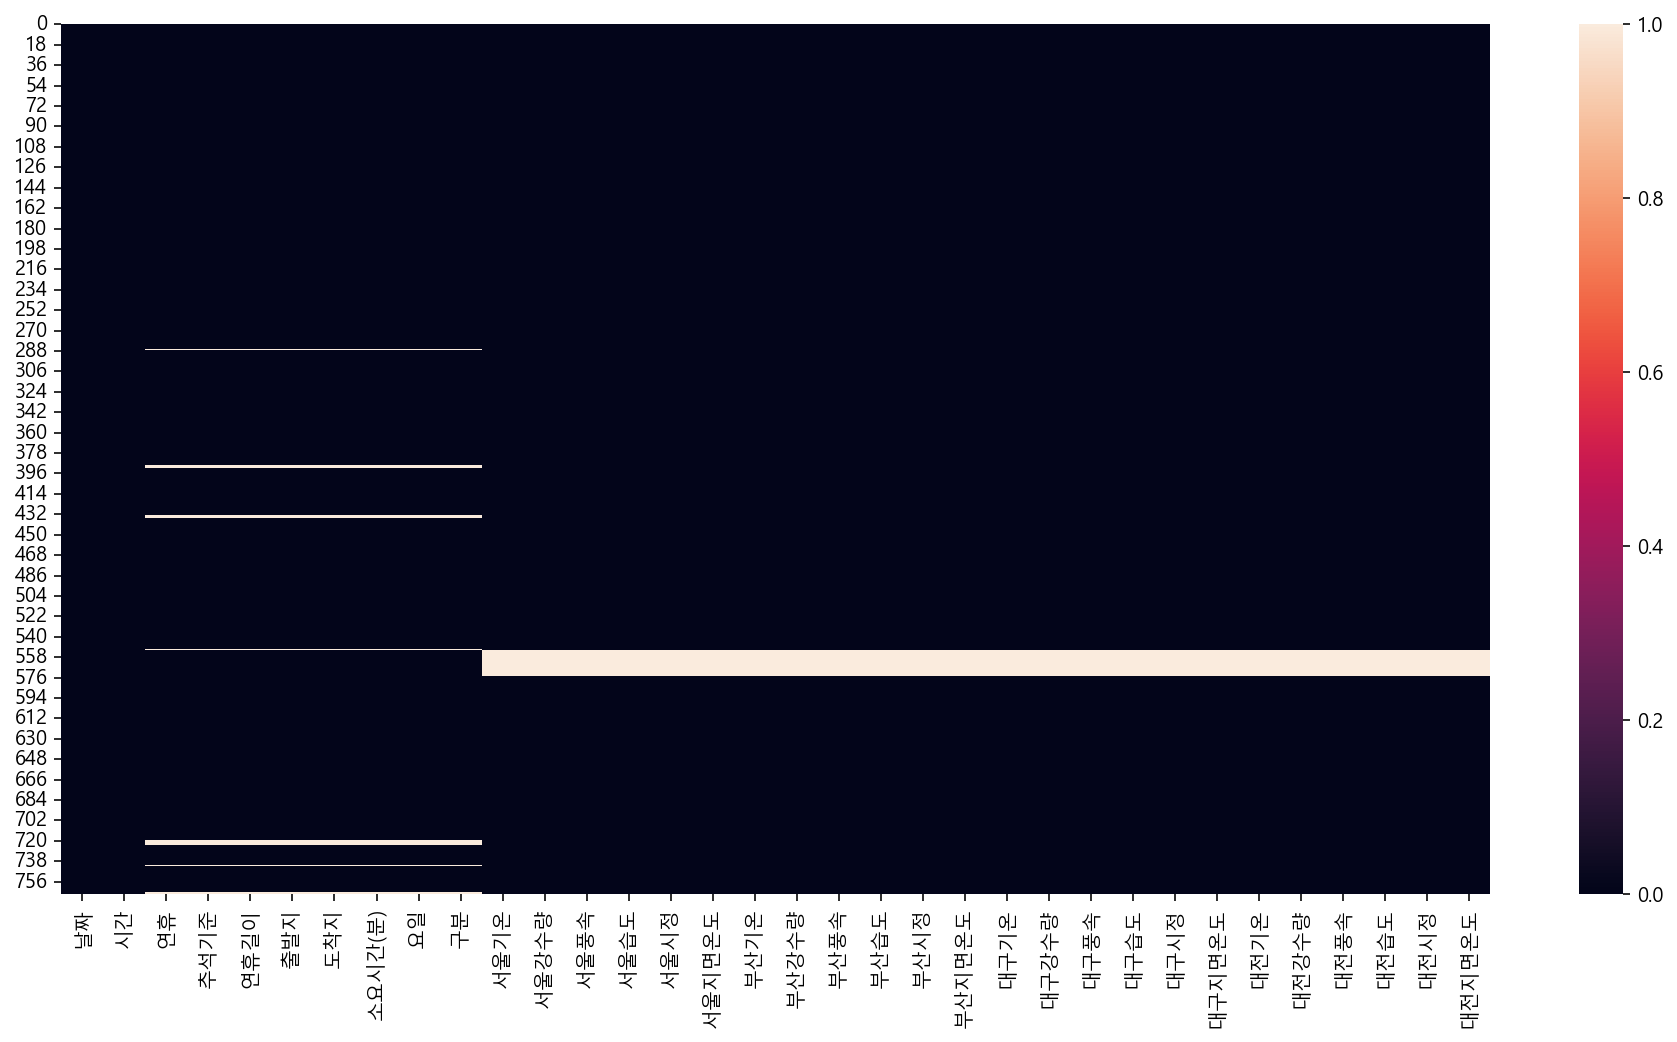

In [121]:
plt.figure(figsize= (16,8))
sns.heatmap(data.isna())
plt.show()

- 소요시간의경우 선형보간 ,나머지 ffill 직접확인후 이상없음을 확인

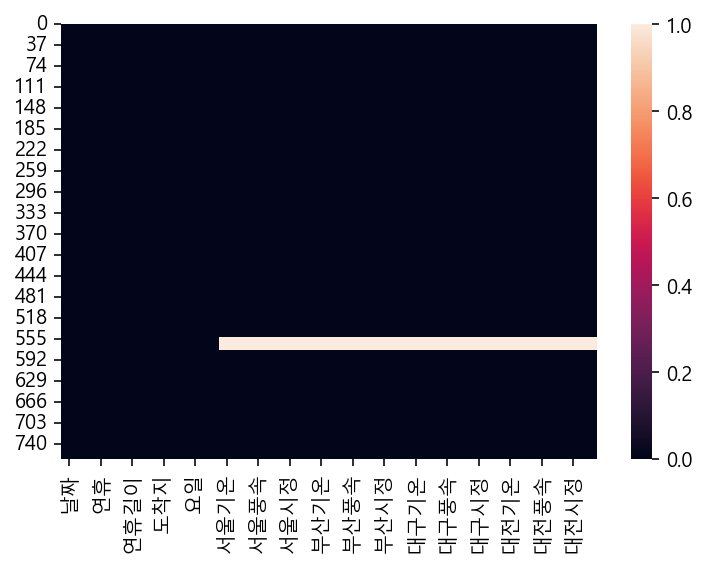

In [127]:
data['연휴'].fillna(method= 'ffill', inplace = True)
data['연휴길이'].fillna(method= 'ffill', inplace = True)
data['출발지'].fillna(method= 'ffill', inplace = True)
data['도착지'].fillna(method= 'ffill', inplace = True)
data['요일'].fillna(method= 'ffill', inplace = True)
data['구분'].fillna(method= 'ffill', inplace = True)
data['추석기준'].fillna(method= 'ffill', inplace = True)
data['소요시간(분)'].interpolate(method = 'linear', inplace = True)
sns.heatmap(data.isna())
plt.show()

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 34 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       767 non-null    datetime64[ns]
 1   시간       767 non-null    int64         
 2   연휴       767 non-null    object        
 3   추석기준     767 non-null    object        
 4   연휴길이     767 non-null    float64       
 5   출발지      767 non-null    object        
 6   도착지      767 non-null    object        
 7   소요시간(분)  767 non-null    float64       
 8   요일       767 non-null    object        
 9   구분       767 non-null    object        
 10  서울기온     744 non-null    float64       
 11  서울강수량    744 non-null    float64       
 12  서울풍속     744 non-null    float64       
 13  서울습도     744 non-null    float64       
 14  서울시정     744 non-null    float64       
 15  서울지면온도   744 non-null    float64       
 16  부산기온     744 non-null    float64       
 17  부산강수량    744 non-null    float64   

- 나머지 날씨데이터에 대해서는 선형 보간

In [ ]:
tmp = data.interpolate(method = 'linear')
tmp.shape

In [128]:
tmp.isna().sum()

날짜          0
시간          0
연휴         14
추석기준       14
연휴길이        0
출발지        14
도착지        14
소요시간(분)     0
요일         14
구분         14
서울기온        0
서울강수량       0
서울풍속        0
서울습도        0
서울시정        0
서울지면온도      0
부산기온        0
부산강수량       0
부산풍속        0
부산습도        0
부산시정        0
부산지면온도      0
대구기온        0
대구강수량       0
대구풍속        0
대구습도        0
대구시정        0
대구지면온도      0
대전기온        0
대전강수량       0
대전풍속        0
대전습도        0
대전시정        0
대전지면온도      0
dtype: int64

In [125]:
tmp2 = data.dropna(axis = 0)
tmp2.shape

(744, 34)

In [136]:
tmp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 766
Data columns (total 34 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       744 non-null    datetime64[ns]
 1   시간       744 non-null    int64         
 2   연휴       744 non-null    object        
 3   추석기준     744 non-null    object        
 4   연휴길이     744 non-null    float64       
 5   출발지      744 non-null    object        
 6   도착지      744 non-null    object        
 7   소요시간(분)  744 non-null    int32         
 8   요일       744 non-null    object        
 9   구분       744 non-null    object        
 10  서울기온     744 non-null    float64       
 11  서울강수량    744 non-null    float64       
 12  서울풍속     744 non-null    float64       
 13  서울습도     744 non-null    float64       
 14  서울시정     744 non-null    float64       
 15  서울지면온도   744 non-null    float64       
 16  부산기온     744 non-null    float64       
 17  부산강수량    744 non-null    float64   

In [134]:
tmp2['소요시간(분)']= tmp2['소요시간(분)'].astype(int)

C:\Users\User\AppData\Local\Temp\ipykernel_12756\299733072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp2['소요시간(분)']= tmp2['소요시간(분)'].astype(int)


In [135]:
tmp2.to_csv('droped_df.csv')

In [137]:
tmp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 766
Data columns (total 34 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       744 non-null    datetime64[ns]
 1   시간       744 non-null    int64         
 2   연휴       744 non-null    object        
 3   추석기준     744 non-null    object        
 4   연휴길이     744 non-null    float64       
 5   출발지      744 non-null    object        
 6   도착지      744 non-null    object        
 7   소요시간(분)  744 non-null    int32         
 8   요일       744 non-null    object        
 9   구분       744 non-null    object        
 10  서울기온     744 non-null    float64       
 11  서울강수량    744 non-null    float64       
 12  서울풍속     744 non-null    float64       
 13  서울습도     744 non-null    float64       
 14  서울시정     744 non-null    float64       
 15  서울지면온도   744 non-null    float64       
 16  부산기온     744 non-null    float64       
 17  부산강수량    744 non-null    float64   

In [100]:
data['소요시간(분)']= data['소요시간(분)'].astype(int)

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 34 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       767 non-null    datetime64[ns]
 1   시간       767 non-null    int64         
 2   연휴       767 non-null    object        
 3   추석기준     767 non-null    object        
 4   연휴길이     767 non-null    float64       
 5   출발지      767 non-null    object        
 6   도착지      767 non-null    object        
 7   소요시간(분)  767 non-null    int32         
 8   요일       767 non-null    object        
 9   구분       767 non-null    object        
 10  서울기온     767 non-null    float64       
 11  서울강수량    767 non-null    float64       
 12  서울풍속     767 non-null    float64       
 13  서울습도     767 non-null    float64       
 14  서울시정     767 non-null    float64       
 15  서울지면온도   767 non-null    float64       
 16  부산기온     767 non-null    float64       
 17  부산강수량    767 non-null    float64   

In [102]:
data.to_csv('perfect_df.csv')